In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
pd.set_option('display.max_rows', 1000); pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['figure.figsize'] = (12, 2)

In [3]:
file_path = "C:\\Users\\akhil\dataset\\hr_data.csv"
df = pd.read_csv(file_path)
('Datprintaset dimensions: {} rows, {} columns '.format(df.shape[0], df.shape[1]))

'Datprintaset dimensions: 14999 rows, 10 columns '

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.describe(include=[object])

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [9]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [10]:
df.duplicated(keep="first").sum()

3008

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(11991, 10)

       left  frequency_percent
left                          
0     10000               83.4
1      1991               16.6


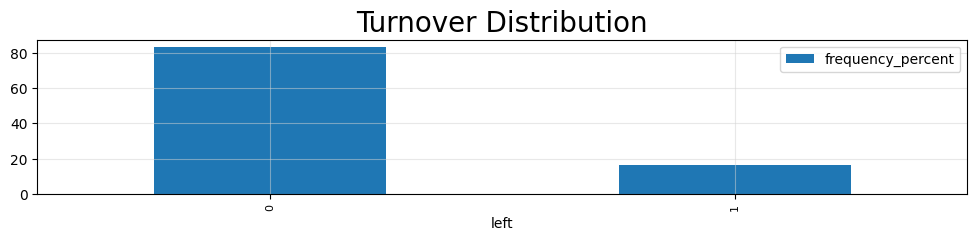

In [13]:
turnover_freq = df[['left']].apply(lambda x: x.value_counts())
turnover_freq['frequency_percent'] = round((100 * turnover_freq / turnover_freq.sum()),2)
print(turnover_freq)
plot = turnover_freq[['frequency_percent']].plot(kind="bar");
plot.set_title("Turnover Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

In [14]:
eda_df = df.copy() 
eda_df['left_Yes'] = eda_df['left'].map({1:1, 0:0})
eda_df['left_No'] = eda_df['left'].map({0:1, 1:0})
eda_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,left_Yes,left_No
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,0


In [15]:
def generate_frequency_graph(col_name):
    temp_grp = eda_df.groupby(col_name).agg('sum')[['left_Yes', 'left_No']]
    temp_grp['Percentage Turnover'] =  temp_grp['left_Yes'] / (temp_grp['left_Yes'] + temp_grp['left_No']) * 100
    print(temp_grp)
    eda_df.groupby(col_name).agg('sum')[['left_Yes', 'left_No']].plot(kind='bar', stacked=False, color=['red', 'blue'])
    plt.xlabel(col_name)
    plt.ylabel('Turnover');

               left_Yes  left_No  Percentage Turnover
Work_accident                                        
0                  1886     8255            18.597771
1                   105     1745             5.675676


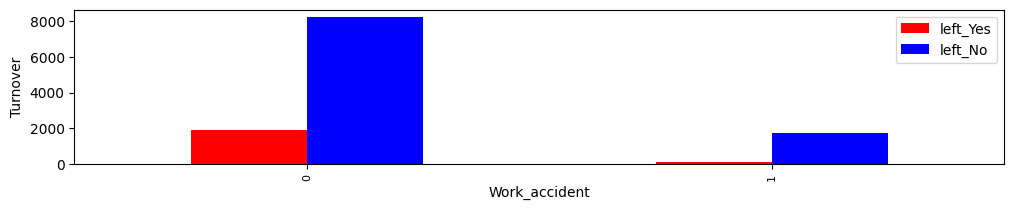

In [16]:
generate_frequency_graph('Work_accident')

                       left_Yes  left_No  Percentage Turnover
promotion_last_5years                                        
0                          1983     9805            16.822192
1                             8      195             3.940887


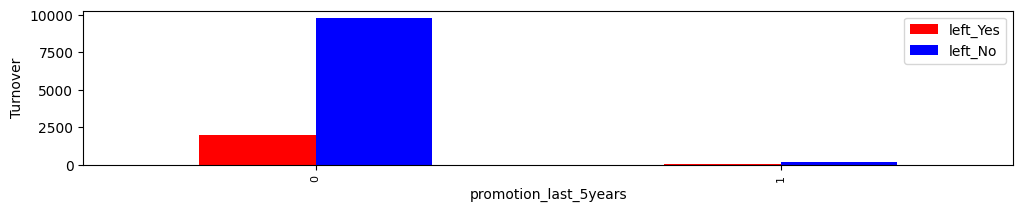

In [17]:
generate_frequency_graph('promotion_last_5years')

             left_Yes  left_No  Percentage Turnover
sales                                              
IT                158      818            16.188525
RandD              85      609            12.247839
accounting        109      512            17.552335
hr                113      488            18.801997
management         52      384            11.926606
marketing         112      561            16.641902
product_mng       110      576            16.034985
sales             550     2689            16.980550
support           312     1509            17.133443
technical         390     1854            17.379679


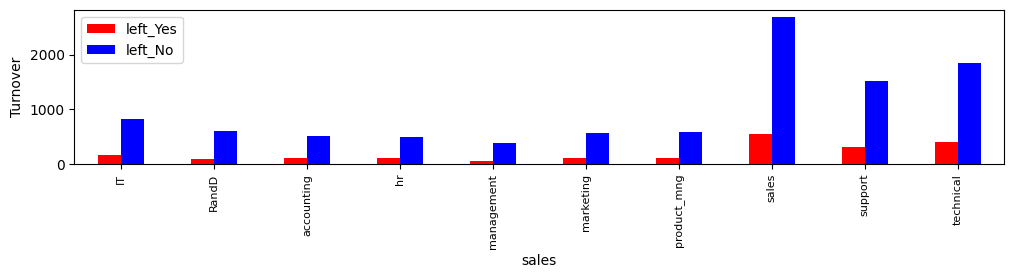

In [18]:
generate_frequency_graph('sales')

        left_Yes  left_No  Percentage Turnover
salary                                        
high          48      942             4.848485
low         1174     4566            20.452962
medium       769     4492            14.616993


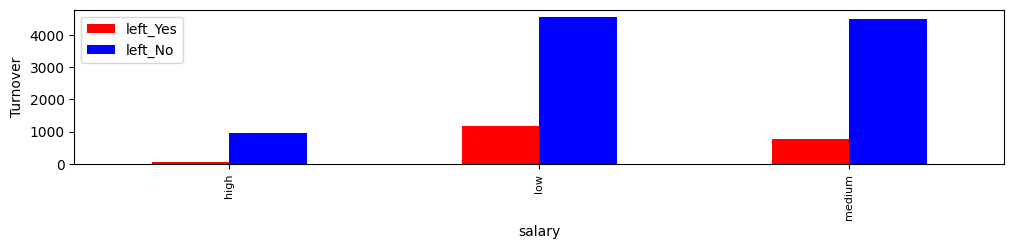

In [19]:
generate_frequency_graph('salary')

                left_Yes  left_No  Percentage Turnover
number_project                                        
2                    857      725            54.171934
3                     38     3482             1.079545
4                    237     3448             6.431479
5                    343     1890            15.360502
6                    371      455            44.915254
7                    145        0           100.000000


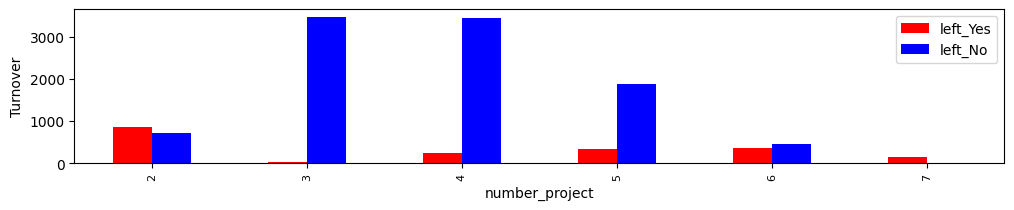

In [20]:
generate_frequency_graph('number_project')

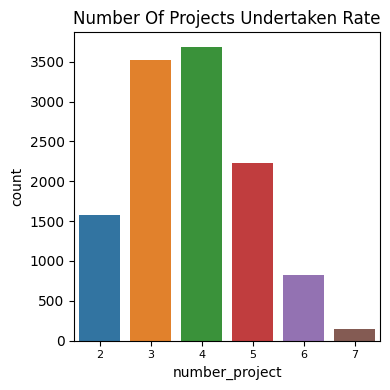

In [21]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x="number_project")
plt.title("Number Of Projects Undertaken Rate")
plt.tight_layout()
plt.show()

In [22]:
df["Work_accident"].value_counts()

Work_accident
0    10141
1     1850
Name: count, dtype: int64

In [23]:
labels = df["Work_accident"].value_counts().index.tolist()
labels

[0, 1]

In [24]:
labels = ["Work Accident" if i == 1 else "No Work Accident" for i in labels]
labels

['No Work Accident', 'Work Accident']

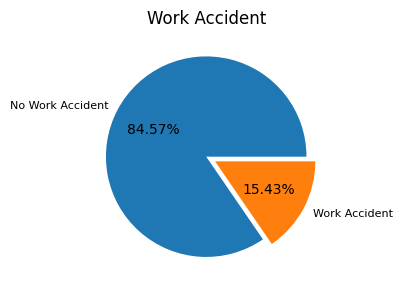

In [25]:
plt.figure(figsize=(4, 4))
plt.pie(x = df["Work_accident"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.1])
plt.title("Work Accident")
plt.tight_layout()

plt.show()

In [26]:
df["time_spend_company"].value_counts()

time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

In [27]:
labels = df["time_spend_company"].value_counts().index.tolist()
labels

[3, 2, 4, 5, 6, 10, 7, 8]

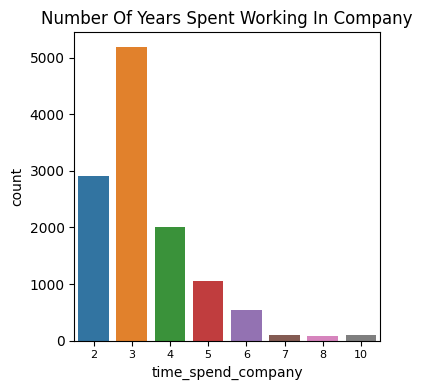

In [28]:
plt.figure(figsize=(4, 4))
sns.countplot(x = "time_spend_company", data=df)
plt.title("Number Of Years Spent Working In Company")
plt.tight_layout()
plt.show()

In [29]:
df["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [30]:
df["sales"].value_counts()

sales
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

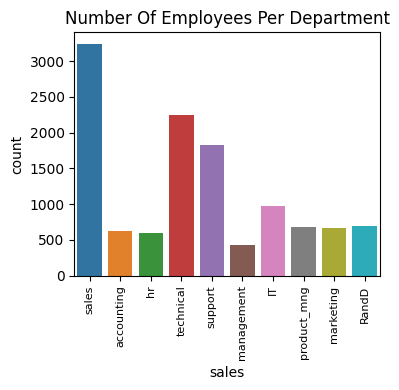

In [31]:
plt.figure(figsize=(4, 4))
sns.countplot(x = "sales", data=df)
plt.title("Number Of Employees Per Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [32]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [33]:
df["salary"].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [34]:
labels = df["salary"].value_counts().index.tolist()
labels

['low', 'medium', 'high']

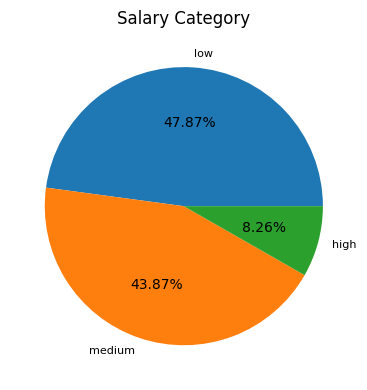

In [35]:
plt.figure(figsize=(4, 4))
plt.pie(x = df["salary"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Category")
plt.tight_layout()
plt.show()

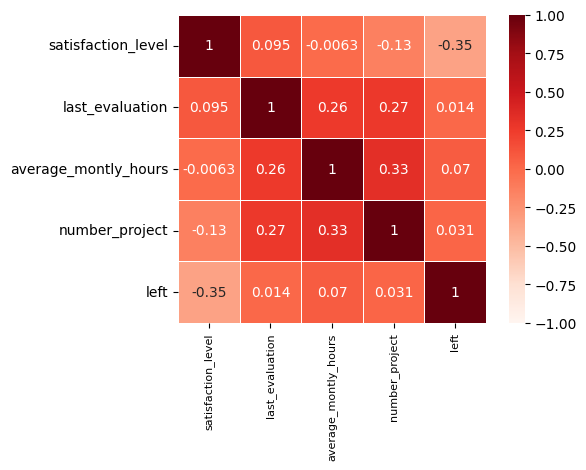

In [36]:
turnover_target = df['left']
num_corr_df = df[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'number_project']]
corr_df = pd.concat([num_corr_df, turnover_target], axis=1)
corr = corr_df.corr()
plt.figure(figsize = (6, 4))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.axes_style("white")
sns.heatmap(data=corr, annot=True, square=True, linewidths=.5, vmin=-1, vmax=1, cmap="Reds")
plt.show()

In [37]:
df.rename(columns={"sales": "department", "salary": "salary_level"}, inplace=True)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'department', 'salary_level'], dtype='object')

In [38]:
categorical_cols = ["department", "salary_level"]
encoded_cols = pd.get_dummies(df[categorical_cols], prefix="cat")

In [39]:
encoded_cols

,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,False,False,False,False,True,False,False,False,False,False,True,False,False
11996,False,False,False,False,True,False,False,False,False,False,True,False,False
11997,False,False,False,False,True,False,False,False,False,False,True,False,False
11998,False,False,False,False,False,True,False,False,False,False,True,False,False


In [40]:
df = df.join(encoded_cols)

In [41]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary_level,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,sales,medium,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,sales,low,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,False,False,False,False,False,False,False,True,False,False,False,True,False


In [42]:
df.drop(["department", "salary_level"], inplace=True, axis="columns")

In [43]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'cat_IT', 'cat_RandD', 'cat_accounting', 'cat_hr', 'cat_management', 'cat_marketing', 'cat_product_mng', 'cat_sales', 'cat_support', 'cat_technical', 'cat_high', 'cat_low', 'cat_medium'], dtype='object')

In [44]:
df.drop(["left"], inplace=True, axis="columns")

In [45]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False


In [46]:
X_train, X_val, y_train, y_val = train_test_split(df, turnover_target,test_size= 0.25, random_state=22);
print("Stratified Sampling: ", len(X_train), "train set +", len(X_val), "validation set")

Stratified Sampling:  8993 train set + 2998 validation set


In [47]:
def gen_model_performance(actual_target, pred_target):
    model_conf_matrix = confusion_matrix(actual_target, pred_target)
    model_roc_score = roc_auc_score(actual_target, pred_target)
    model_accuracy = accuracy_score(actual_target, pred_target) * 100.0  
    TP = model_conf_matrix[1][1]; TN = model_conf_matrix[0][0]; 
    FP = model_conf_matrix[0][1]; FN = model_conf_matrix[1][0];
    sensitivity = TP / float(TP + FN) * 100.0; specificity = TN / float(TN + FP) * 100.0;
    precision = TP / float(TP + FP) * 100.0;
    return sensitivity, specificity, model_accuracy, precision, model_roc_score

In [48]:
def evaluate_model_score(X,X_val, y,Y_val, scoring='accuracy'):    
    logreg_model = LogisticRegression(random_state=0)
    rfc_model = RandomForestClassifier()
    dt_model = DecisionTreeClassifier()
    models = [logreg_model,dt_model,rfc_model]
    model_results = []
#     model_results_df = pd.DataFrame(columns = ["Model", "Accuracy", "Precision", "CV Score","Specificity"])
    for model in models:
        model.fit(X, y,)
        y_pred = model.predict(X_val)
        print('Model:',model.__class__.__name__)
        print('\n')
        confusion_matrix = metrics.confusion_matrix(Y_val, y_pred)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
        cm_display.plot()
        plt.show()
        print('\n')
        score = cross_val_score(model, X, y, cv=5, scoring=scoring)        
        sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_val, y_pred)  
        scores = cross_val_score(model, X, y, cv=5)    
        model_results.append({"Model": model.__class__.__name__,
                              "Accuracy": accuracy,
                              "Precision": precision,
                              "CV Score": scores.mean() * 100.0,
                              "Specificity": specificity,
                             "Sensitivity":sensitivity})
    model_results_df = pd.DataFrame(model_results)
    return model_results

Model: LogisticRegression




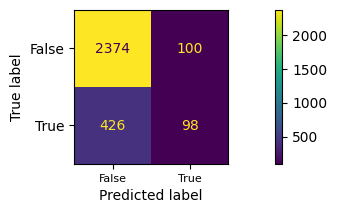



Model: DecisionTreeClassifier




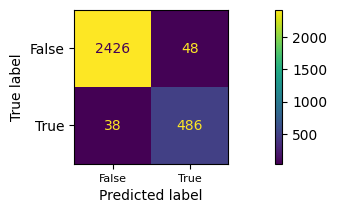



Model: RandomForestClassifier




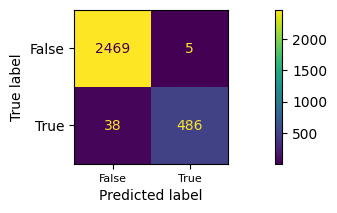

,Model,Accuracy,Precision,CV Score,Specificity,Sensitivity
0,LogisticRegression,82.454970,49.494949,83.353593,95.957963,18.702290
1,DecisionTreeClassifier,97.131421,91.011236,96.630708,98.059822,92.748092
2,RandomForestClassifier,98.565710,98.981670,98.198628,99.797898,92.748092


In [49]:
model_results= evaluate_model_score(X_train,X_val,y_train,y_val)
model_results_df=pd.DataFrame(model_results)
model_results_df

In [ ]:
# using inputs to predict the output
a=float(input("enter value for satisfaction level (between 0 & 1) "))
b=float(input("enter value for last evaluation (between 0 & 1) "))
c=int(input("enter the number of projects the employee was part of "))
d=int(input("enter the average monthly hours worked by the employee for the company "))
e=int(input("enter the number of years employee has been working for the company "))
f1=input("Did the employee go through any work accident (Yes/No) ")
f=0
if(f1=="Yes"):
  f=1
g1=input("Did the employee get any promotion in the last 5 years (Yes/No) ")
g=0
if(g1=="Yes"):
  g=1
dep=[0,0,0,0,0,0,0,0,0,0]
no=int(input("enter department number  (1.IT  2.RandD  3.accounting  4.hr  5.management  6.marketing  7.product manager  8.sales  9.support  10.technical) "))
dep[no-1]=1
print(dep)
sal_lvl=[0,0,0]
lvl=int(input("enter salary level (1-high  2-low  3-medium) "))
sal_lvl[lvl-1]=1
features = np.array([[a,b,c,d,e,f,g,dep[0],dep[1],dep[2],dep[3],dep[4],dep[5],dep[6],dep[7],dep[8],dep[9],sal_lvl[0],sal_lvl[1],sal_lvl[2]]])
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)
prediction=rfc_model.predict(features)
if(prediction[0]==1):
  print("Employee will leave the company")
else:
  print("Employee will not leave the company")

enter value for satisfaction level (between 0 & 1) 0.38
enter value for last evaluation (between 0 & 1) 0.57
enter the number of projects the employee was part of 2
enter the average monthly hours worked by the employee for the company 159
enter the number of years employee has been working for the company 5
Did the employee go through any work accident (Yes/No) Yes
Did the employee get any promotion in the last 5 years (Yes/No) No
enter department number  (1.IT  2.RandD  3.accounting  4.hr  5.management  6.marketing  7.product manager  8.sales  9.support  10.technical) 9
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
enter salary level (1-high  2-low  3-medium) 2
Employee will not leave the company
